# Create Project

In [79]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# statistical tools
import scipy.stats as stats

In [80]:
# create the dataframe
filename = 'insurance - insurance.csv'
hypo_df=pd.read_csv(filename)

In [82]:
#check the data loaded
hypo_df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [83]:
# check columns
hypo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Project descriptions
- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

### Five Steps
- State your Null Hypothesis and Alternative Hypothesis
- Select the correct test according to the data type and number of samples
- Test the assumptions of your selected test.
- Execute the selected test, or the alternative test (if you do not meet the assumptions)
- Interpret your p-value and reject or fail to reject your null hypothesis 
- Show a supporting visualization that helps display the result

# First question

### Hypothesis
- Null: Smokers and Non-Smokers have the same insurance
- Alternate: Smokers and non-smokers have different insurance rates,

### Test type
- T-test

In [84]:
# see how many smokers
hypo_df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [85]:
# split the data into two groups
# Filtering out those with
smoker_df = hypo_df.loc[hypo_df['smoker']== 'yes'].copy()
no_smoker_df = hypo_df.loc[hypo_df['smoker']== 'no'].copy()

In [86]:
smoker_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       274 non-null    int64  
 1   sex       274 non-null    object 
 2   bmi       274 non-null    float64
 3   children  274 non-null    int64  
 4   smoker    274 non-null    object 
 5   region    274 non-null    object 
 6   charges   274 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 17.1+ KB


In [87]:
smoker_df.smoker.value_counts()

yes    274
Name: smoker, dtype: int64

In [88]:
smoker_insure = smoker_df['charges']
no_smoker_insure = no_smoker_df['charges']

In [99]:
smoker = hypo_df.loc[ hypo_df['smoker'] == 'yes'].copy()
no_smoker = hypo_df.loc[ hypo_df['smoker'] == 'no'].copy()


### Check Assumptions for independent T-test
- outliers
- normality ( discuss sample size > 15)
- equal variance


In [104]:
## to get the probability of 1121 in charges 
1-stats.norm.cdf(1121, loc=np.mean(data), scale= np.std(data))

0.9963704746277452

In [91]:
# check for outliers

In [92]:
# Check for outliers in weight for strength group
zscores= stats.zscore(smoker_insure)
outliers = abs(zscores)>3
np.sum(outliers)

0

- There are no outliers in smokers. 

In [93]:
# check for outliers in no smoker group
zscores= stats.zscore(no_smoker_insure)
outliers = abs(zscores)>3
np.sum(outliers)

24

- There are 24 outliers in no smoker group. 

In [94]:
# remove outlier for no smoker group
no_smoker_insure = no_smoker_insure[(np.abs(stats.zscore(no_smoker_insure)) < 3)]

In [15]:
# check for outliers in no smoker group
zscores= stats.zscore(no_smoker_insure)
outliers = abs(zscores)>3
np.sum(outliers)

0

- The sample size is > 15. This means that there is no need to test for normality or adjust testing. 

In [95]:
# test the smoker group for normality
result_smoker_insure = stats.normaltest(smoker_insure)
result_smoker_insure

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [96]:
# test the no smoker group for normality
result_no_smoker_insure = stats.normaltest(no_smoker_insure)
result_no_smoker_insure

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

-  p-values for both group are well below 0.05 which means our data is NOT normally distributed. 
- However sample size is large enough to proceed.

In [97]:
# Test for equal variance
result = stats.levene(smoker_insure, no_smoker_insure)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

- Need to set equal variance = "False"

### Statistical Testing

In [98]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(smoker_insure, no_smoker_insure, equal_var = False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

### Interpret Test

The p value < alpha (0.05), so the null hypothesis is rejected.Based on this dataset, the alternalte hypothesis is supported-- Smoker and non-smokers have different insurance charges. 

### Preliminary visual

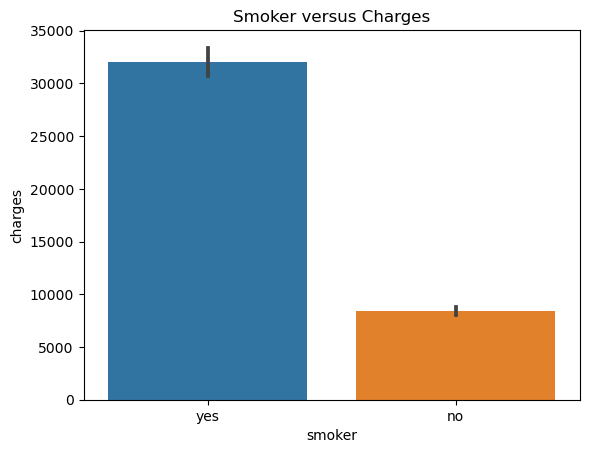

In [61]:
sns.barplot(data=hypo_df, x='smoker', y='charges').set(title='Smoker versus Charges');


# Second Question

### Overview

### Hypothesis
- Null: Men and Women smoke at the same rate or have the same smoking habits.
- Alternate: Men and women have different smoking habits rates. 

### Test type
- Chi-squared

### Statistical Testing

In [63]:
hypo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [64]:
# see how many men
hypo_df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [66]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(hypo_df['sex'], hypo_df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [67]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [68]:
# What was our p-value?
print(p)
p<.05



0.006548143503580696


True

### Intepret Testing

- Since  p < .05, I can  reject the null hypothesis that smoking habits are the same between sexes.  From this data, there is evidence of a relationship between smoking habits and biological sex. 

### Preliminary Visual

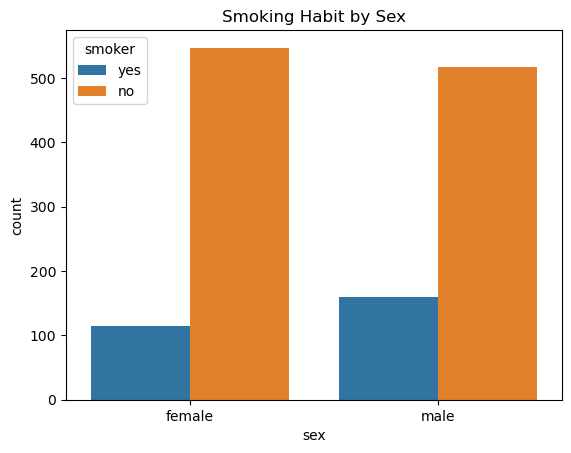

In [69]:
#visualize the data
ax = sns.countplot(data=hypo_df, x='sex',hue='smoker',)
ax.set_title("Smoking Habit by Sex");

# Third question

## Overview

- Do different regions have different charges?

- Null hypothesis: All regions have the same charges
- Alternate: There are different charges in different regions. 

## Test type
- ANOVA

In [111]:
hypo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [72]:
## Create groups dictionary. 
groups = {}
## Loop through all unique categories
for i in hypo_df['region'].unique():
    ## Get series for group and rename
    data = hypo_df.loc[hypo_df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

## Check Assumptions for ANOVA
- outliers
- normality
- equal variance

In [73]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [74]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


### Check for Outliers

In [112]:
hypo_df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

- Because outliers were removed earlier, there is no need to remove them here.

In [75]:
# check for equal variance
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

## Interpret Testing

In [122]:
# run the test with a change because it failed equal variance
# Independent t-test with equal_var set to False
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

- This is a significant p value and can reject the null hypothesis. However it is not known which groups so further testing with Tukey's is needed.

In [76]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as kg_lost and the labels to the Diet
values = hypo_df['charges']
labels = hypo_df['region']

In [77]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


- There is a significant difference between southeast and southwest charges

## Preliminary visual

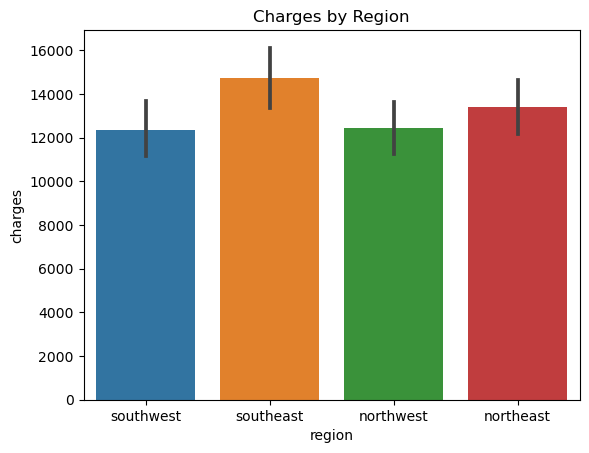

In [106]:
#visualize the data
ax= sns.barplot(data=hypo_df, x='region',y='charges');
ax.set_title("Charges by Region");

## Moved Code from first question as per suggested during code review

In [89]:
hypo_df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [100]:
data = smoker['charges']
mean = np.mean(data)
std = np.std(data)
min = np.min(data)
max = np.max(data)

In [101]:
low_end = 1121
high_end = max

In [102]:
x_range = np.linspace(min, max, 1000)

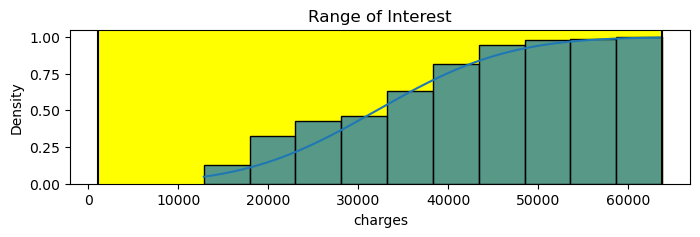

In [103]:
#visualize data?
cdf = stats.norm.cdf(x_range, loc=mean, scale=std)
fig, ax = plt.subplots(figsize=(8,2))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range,cdf)
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0)
ax.set_title('Range of Interest');

- P-value = There is a probability of .9963 (or a 99% chance) that a smoker  would have a charges more than 1121 or the minimum.